# Deeplab

In [1]:
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
from learn import *

In [2]:
sz = 256
num_slice = 25

num_gpus = 2
gpu_start = 4
num_workers = 8
device_ids = range(gpu_start, gpu_start + num_gpus)
torch.cuda.set_device(gpu_start)
bs = 10 * num_gpus

In [3]:
model_name = 'deeplab'

In [4]:
data = None

In [5]:
learn, denorm, data = learner_on_dataset(datapaths[0], bs, device_ids, num_workers, model_name='deeplab',
                                         debug=False, global_dataset=True, data=data, num_slice=num_slice, sz=sz)
(trn_x,trn_y), (val_x,val_y) = data


Data finished loading: data/train/AOI_3_Paris_Train


In [6]:
learn.load('deeplab-paris')
learn.unfreeze()

In [ ]:
%%time
lr = 1e-5 / 2
lrs = np.array([lr/9, lr])
wd = 0.01
wds = [wd/9, wd]
learn.unfreeze()
train_and_plot(learn, 0, 'deeplab-paris', lrs=lrs, n_cycles=4, wds=wds, use_wd_sched=True,
               cycle_len=2, cycle_mult=2, best_save_name='deeplab-paris')

epoch      trn_loss   val_loss   mask_acc                      
    0      0.12665    0.082844   0.068648  
    1      0.126703   0.08115    0.068648                      
    2      0.126555   0.084731   0.068648                      
    3      0.121601   0.080089   0.068648                      
    4      0.121416   0.078596   0.068648                      
    5      0.127748   0.078854   0.068648                      
    6      0.128481   0.078688   0.068648                      
    8      0.122418   0.083283   0.068648                      
    9      0.123424   0.084707   0.068648                      
 96%|█████████▋| 967/1004 [23:08<00:53,  1.44s/it, loss=0.125]

  2%|▏         | 2/121 [00:06<06:06,  3.08s/it, loss=0.123]  


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/twofyw/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   mask_acc                    
    0      0.259184   1.64266    0.802396  



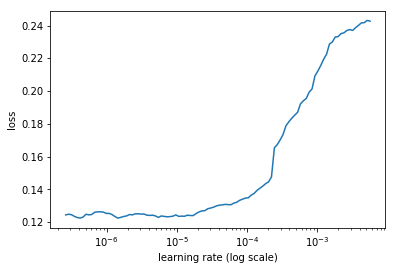

In [8]:
learn.lr_find(1e-7, 1e-2)
learn.sched.plot()